In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv

In [2]:

df = read_csv("movies.csv",header=0,index_col=0)
print(df)

          budget                            genres  \
id                                                   
5        4000000                      Crime|Comedy   
6       21000000             Action|Thriller|Crime   
11      11000000  Adventure|Action|Science Fiction   
12      94000000                  Animation|Family   
13      55000000              Comedy|Drama|Romance   
...          ...                               ...   
920081         0                     Action|Horror   
920143         0                            Comedy   
922017         0                            Comedy   
922162         0                               NaN   
922260    254056           Mystery|Thriller|Horror   

                                                 homePage  \
id                                                          
5               https://www.miramax.com/movie/four-rooms/   
6                                                     NaN   
11      http://www.starwars.com/films/star-wars-episo

In [3]:
# inciso 4.2 
print("¿Cuáles son las 10 películas que más ingresos tuvieron? ")
indexes = df['budget'].sort_values(ascending=False).head(10).index.to_list()
results = df.loc[indexes, 'title']
print(results)
results2 = df.loc[indexes, 'budget']
print(results2)

¿Cuáles son las 10 películas que más ingresos tuvieron? 
id
1865      Pirates of the Caribbean: On Stranger Tides
99861                         Avengers: Age of Ultron
299534                              Avengers: Endgame
141052                                 Justice League
299536                         Avengers: Infinity War
285          Pirates of the Caribbean: At World's End
1452                                 Superman Returns
420818                                  The Lion King
38757                                         Tangled
559                                      Spider-Man 3
Name: title, dtype: object
id
1865      380000000
99861     365000000
299534    356000000
141052    300000000
299536    300000000
285       300000000
1452      270000000
420818    260000000
38757     260000000
559       258000000
Name: budget, dtype: int64


In [4]:
# inciso 4.4
print("¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?")
indexes = df['voteAvg'].sort_values().head(1).index.to_list()
print(indexes)
results = df.loc[indexes, 'title']
print(results)
results2 = df.loc[indexes, 'voteAvg']
print(results2)

¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?
[820530]
id
820530    DAKAICHI -I'm Being Harassed by the Sexiest Ma...
Name: title, dtype: object
id
820530    1.3
Name: voteAvg, dtype: float64


¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico
Generos principales de las 20 peliculas mas recientes:
{'Comedy': 6, 'Documentary': 1, 'Romance': 1, 'Drama': 4, 'Horror': 1, 'Animation': 1, 'n/a': 2, 'Thriller': 1, 'Action': 3}


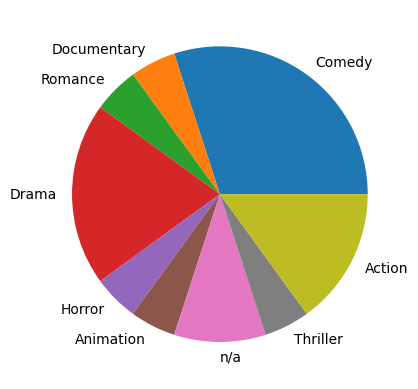

In [5]:

# inciso 4.6
print("¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico")
indexes = df['releaseDate'] 
indexes = indexes.apply(pd.to_datetime).sort_values(ascending=False).head(20).index.to_list()
results = df.loc[indexes, 'genres'].values.tolist()
results2 = []

for i in results:
    if isinstance(i, str):
        results2.append(i.rsplit('|')[0])
    else:
        results2.append('n/a')

print(f"Generos principales de las 20 peliculas mas recientes:")

def count_items(l:list, item):
    return l.count(item)

final = {}
labels = set(results2)

for i in labels:
    final[i] = count_items(results2,i)

print(final)

plt.pie(final.values(),labels=final.keys())
plt.show()

In [8]:
# inciso 4.8
print("¿La cantidad de actores influye en los ingresos de las películas?\n¿se han hecho películas con más actores en los últimos años?")
corr_actorsAmont_and_revenue = df['actorsAmount'].corr(df['revenue'])
print("Indice de correlacion entre cantidad de actores e ingresos:", corr_actorsAmont_and_revenue)
# print(df['revenue'].apply(pd.to_datetime))

df2 = pd.DataFrame()
df2['actors'] = df['actorsAmount']
df2['time'] = pd.to_datetime(df['releaseDate'])
df2['timestamp'] = df2['time'].values.astype(float) # / 10**9
# print(df2)
corr_actorsAmount_and_time = df2['actors'].corr(df2['timestamp'])
print("Indice de correlacion entre cantidad de actores y tiempo:", corr_actorsAmount_and_time)

df_sorted = df2.sort_values(by='time', ascending=False)
# print(df_sorted)

¿La cantidad de actores influye en los ingresos de las películas?
¿se han hecho películas con más actores en los últimos años?
Indice de correlacion entre cantidad de actores e ingresos: -0.019554880174247613
Indice de correlacion entre cantidad de actores y tiempo: 0.024823053261114676


In [10]:
# inciso 4.10
print("¿Quiénes son los directores que hicieron las 20 películas mejor calificadas? ")
indexes = df['voteAvg'].sort_values(ascending=False).head(20).index.to_list()
# print(indexes)
results = df.loc[indexes, 'director']
print(results)
results2 = df.loc[indexes, 'voteAvg']
print(results2)

¿Quiénes son los directores que hicieron las 20 películas mejor calificadas? 
id
685523                         Laurent Bouzereau
805973                            Christin Baker
853253                                       NaN
672588                             Rebecca Sugar
912223                       Miguel Angel Zavala
577015                              Thomas Coven
700302                              Kaku Arakawa
641026                V�ctor Barba|Juan Olivares
385522                                       NaN
399712    Dave Bullock|Troy Adomitis|Victor Cook
710692                            Won Myeong-jun
436951                                       NaN
448387                                       NaN
329824                              Samuel Leong
251799                        Selena Quintanilla
811948                            Haruo Sotozaki
820232                            Haruo Sotozaki
730647                              Park Jun-soo
529414                           Ulis

In [11]:
# inciso 4.12
print("¿Se asocian ciertos meses de lanzamiento con mejores ingresos?")
df2 = pd.DataFrame()
df2['revenue'] = df['revenue']
df2['months'] = pd.to_datetime(df['releaseDate']).dt.month
grouped = df2.groupby('months').sum()
grouped2 = df2.groupby('months').mean()
grouped3 = df2.groupby('months').count()
print("\nsuma de ingresos por mes:")
print(grouped)
print("\nmedia de ingresos por mes:")
print(grouped2)
print("\npeliculas totales por mes:")
print(grouped3)

¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

suma de ingresos por mes:
             revenue
months              
1       2.202045e+10
2       3.029330e+10
3       4.165949e+10
4       3.660657e+10
5       6.131612e+10
6       7.759788e+10
7       6.173530e+10
8       3.284068e+10
9       3.445130e+10
10      4.163847e+10
11      5.769413e+10
12      6.952555e+10

media de ingresos por mes:
             revenue
months              
1       3.377369e+07
2       4.290835e+07
3       5.111594e+07
4       5.259565e+07
5       8.784544e+07
6       9.474711e+07
7       7.602870e+07
8       3.597008e+07
9       3.192892e+07
10      3.898733e+07
11      7.149211e+07
12      7.435888e+07

peliculas totales por mes:
        revenue
months         
1           652
2           706
3           815
4           696
5           698
6           819
7           812
8           913
9          1079
10         1068
11          807
12          935


In [12]:
# inciso 4.14
print("¿Cómo se correlacionan las calificaciones con el éxito comercial? ")
corr_votes_and_revenue = df['voteAvg'].corr(df['revenue'])
print(corr_votes_and_revenue)

¿Cómo se correlacionan las calificaciones con el éxito comercial? 
0.14126181161900306
